In [1]:
from PIL import Image
import os

from src.gans import Modifier
from src.features import AkiwiFeatureGenerator, ResnetFeatureGenerator
from src.search import Search, CombinedSearch

from src.pipeline import FashionGANApp

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load Search Models
Load Resnet and Akiwi50 features to retrieve with combined Resnet50 features.

In [2]:
folder_gens = {'akiwi_50': AkiwiFeatureGenerator(50), 
               'resnet': ResnetFeatureGenerator()}

In [3]:
dress_imgs = './data/images/fashion/dresses/'
model_imgs = './data/images/fashion_models/dresses_clustered/'

dress_feats = './data/features/fashion/dresses/'
model_feats = './data/features/fashion_models/dresses/'

In [4]:
dress_search = {}
for dir_name, gen in folder_gens.items():
    dress_search[dir_name] = Search(dress_imgs, os.path.join(dress_feats, dir_name), gen)

Loading features from: ./data/features/fashion/dresses/akiwi_50
Loading features from: ./data/features/fashion/dresses/resnet


In [5]:
model_search = {}
for dir_name, gen in folder_gens.items():
    model_search[dir_name] = Search(model_imgs, os.path.join(model_feats, dir_name), gen)

Loading features from: ./data/features/fashion_models/dresses/akiwi_50
Loading features from: ./data/features/fashion_models/dresses/resnet


In [6]:
# combined search
dress_resnet50 = CombinedSearch([dress_search['akiwi_50'], dress_search['resnet']], factors=[2, 1])
model_resnet50 = CombinedSearch([model_search['akiwi_50'], model_search['resnet']], factors=[2, 1])

# FashionGAN Search
Create a FashionGANApp by providing a GAN modifier and searches for products and models.
Start the app with an image and follow the instructions in the console.

The usage flow is as follows:
1. start app with an input image
2. select a shape attribute to modify or skip shape modification
3. select a pattern attribute to modify or skip pattern modification
4. select an image from the returned results to start again

The model search results are only illustrative, continue modification option is only available when a product image is selected.

In [7]:
modifier = Modifier('./data/models/')
app = FashionGANApp(modifier, dress_resnet50, model_resnet50)

In [8]:
test_img = Image.open('./data/images/fashion/dresses/9815337.jpg')

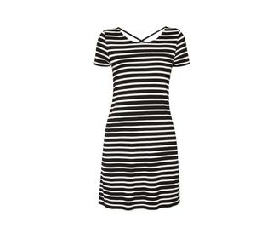

SHAPE MODIFICATION
------------------------------
Choose from the following: ['sleeve_length', 'fit', 'neckline']
or press ENTER to skip
sleeve_length

Choose from the following: ['3/4', 'long', 'short', 'sleeveless']
long



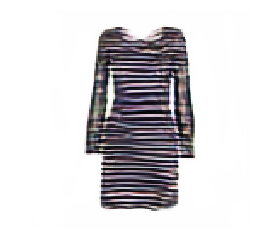

PATTERN MODIFICATION
------------------------------
Choose from the following: ['floral', 'stripes']
or press ENTER to skip
stripes

Choose from the following: ['add', 'remove']
remove



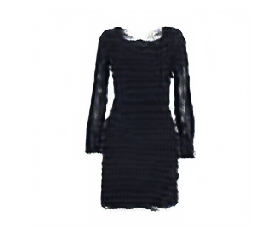

MODEL IMAGE
------------------------------


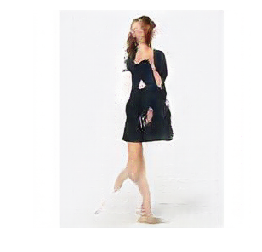

MODEL SEARCH
------------------------------


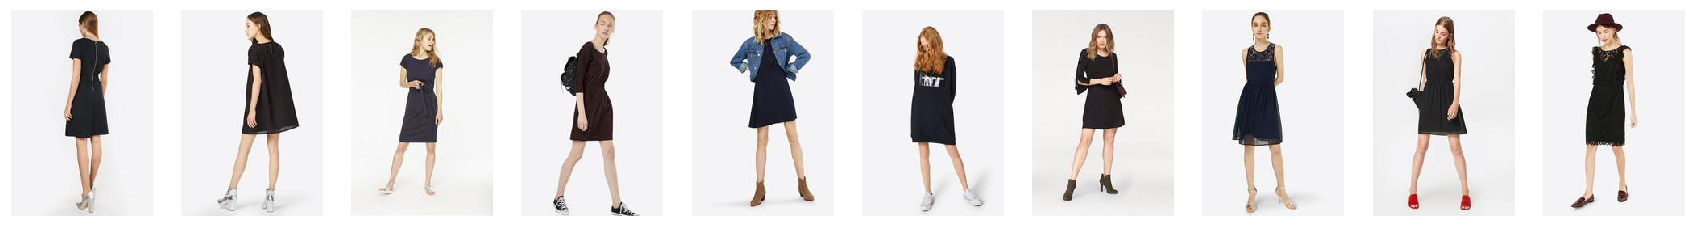

SIMILAR PRODUCTS FROM PRODUCT SEARCH
------------------------------


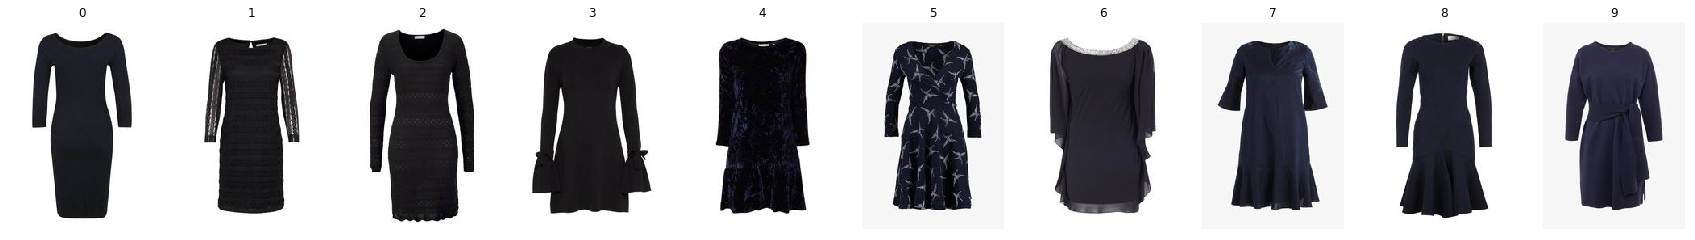

SELECT BEST IMAGE
------------------------------
Choose from the following: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
or press ENTER to skip




In [10]:
app.start(test_img)